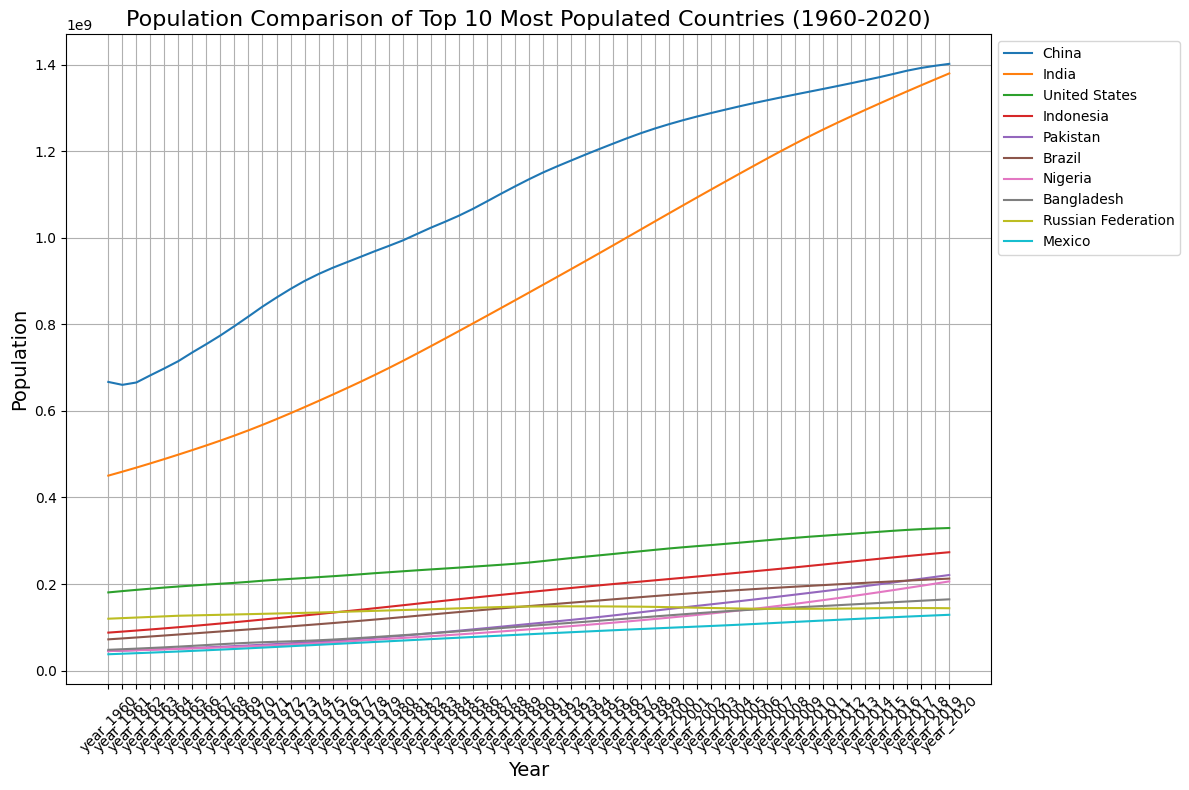

In [2]:
#Sp20-bse-041
#Abdul Rafay
#IDS assignment#2
#Question#1

import pandas as pd
import matplotlib.pyplot as plt

# Read the dataset
data = pd.read_csv("/content/sample_data/world_pop.csv")

# Set the index to 'country'
data.set_index('country', inplace=True)

# Extract populations of the top 10 most populated countries in 2020
top_10_countries_2020 = data.loc[data['year_2020'].nlargest(10).index]

# Transpose the dataframe for plotting
top_10_countries_2020 = top_10_countries_2020.T

# Plotting
plt.figure(figsize=(12, 8))

# Plot each country's population
for country in top_10_countries_2020.columns:
    plt.plot(top_10_countries_2020.index, top_10_countries_2020[country], label=country)

# Add labels and title
plt.title('Population Comparison of Top 10 Most Populated Countries (1960-2020)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Population', fontsize=14)

# Add legend
plt.legend(loc='upper left', fontsize=10, bbox_to_anchor=(1, 1))

# Show grid
plt.grid(True)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.tight_layout()
plt.show()


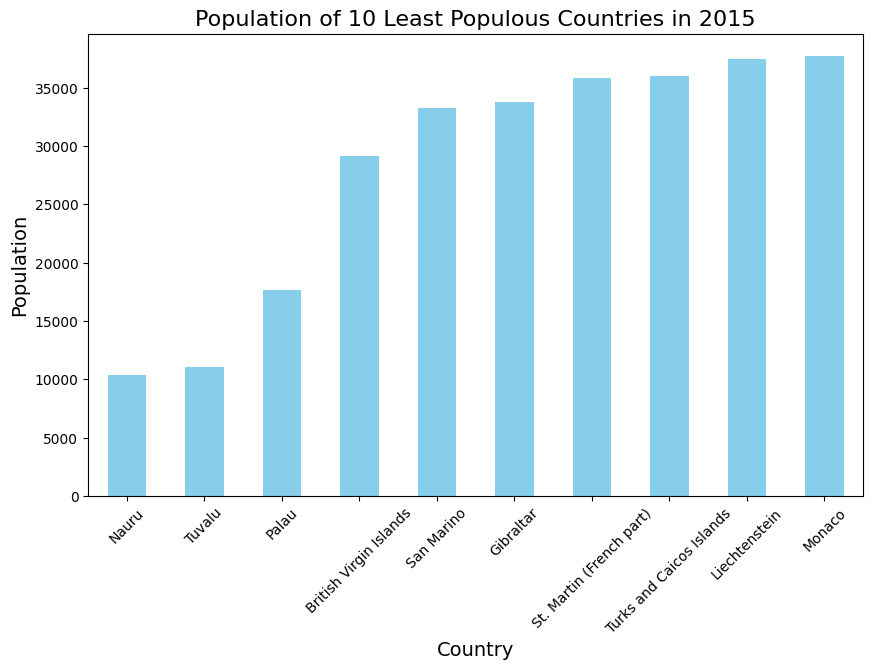

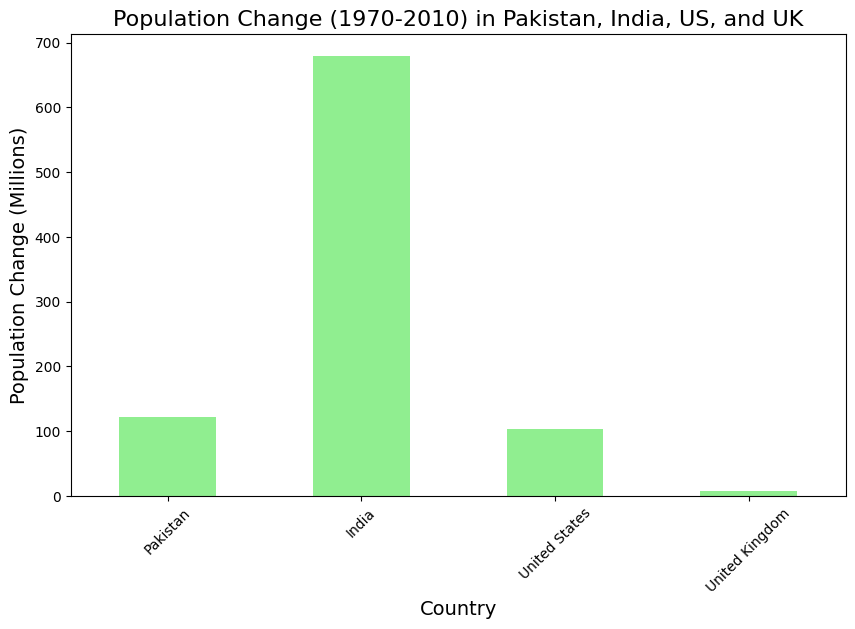

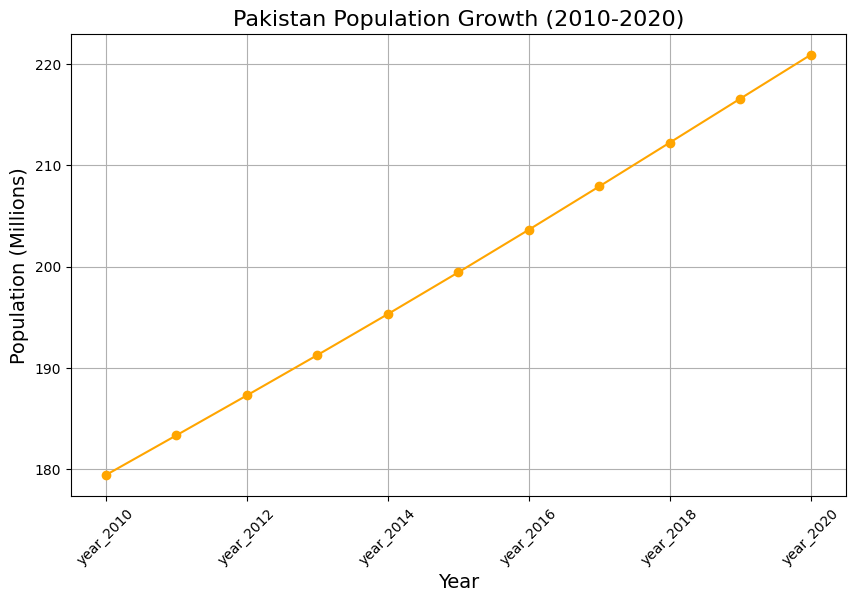

In [3]:
# Question#2

import pandas as pd
import matplotlib.pyplot as plt

# Read the dataset
data = pd.read_csv("/content/sample_data/world_pop.csv")

# Set the index to 'country'
data.set_index('country', inplace=True)

# Show the population of 10 least populous countries in 2015 using a chart
least_populous_2015 = data['year_2015'].nsmallest(10)
least_populous_2015.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Population of 10 Least Populous Countries in 2015', fontsize=16)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Population', fontsize=14)
plt.xticks(rotation=45)
plt.show()

# Calculate the change in population of Pakistan, India, United States, and United Kingdom from 1970 to 2010
countries = ['Pakistan', 'India', 'United States', 'United Kingdom']
population_change = data.loc[countries, 'year_1970':'year_2010']
population_change['Change'] = population_change['year_2010'] - population_change['year_1970']

# Show the population change (in millions) using a chart
population_change['Change'] = population_change['Change'] / 1e6  # Convert to millions
population_change['Change'].plot(kind='bar', figsize=(10, 6), color='lightgreen')
plt.title('Population Change (1970-2010) in Pakistan, India, US, and UK', fontsize=16)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Population Change (Millions)', fontsize=14)
plt.xticks(rotation=45)
plt.show()

# Calculate the Pakistan population growth between 2010-2020
pakistan_population_growth = data.loc['Pakistan', 'year_2010':'year_2020']
pakistan_population_growth = pakistan_population_growth / 1e6  # Convert to millions

# Show the data using a chart
pakistan_population_growth.plot(kind='line', figsize=(10, 6), marker='o', color='orange')
plt.title('Pakistan Population Growth (2010-2020)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Population (Millions)', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


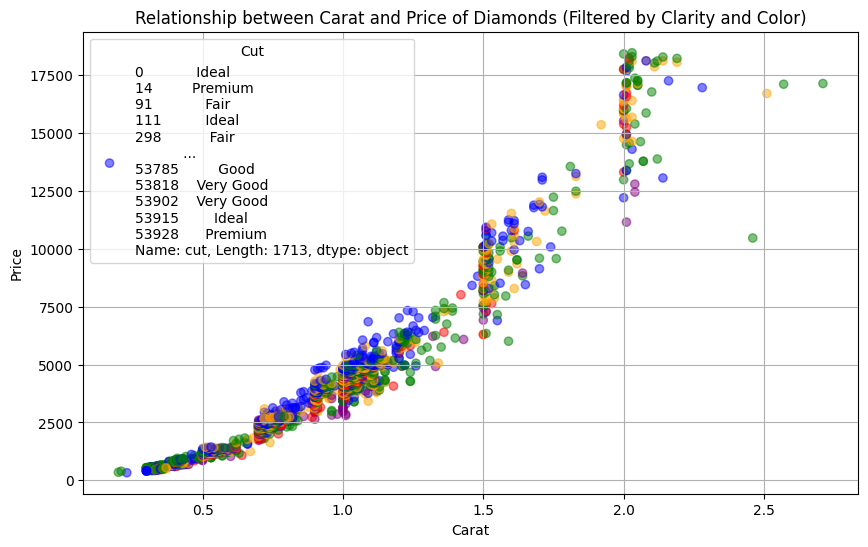

In [4]:
# Question#3

import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("/content/sample_data/diamonds.csv")

# Filter the dataset based on specified conditions
filtered_data = data[(data['clarity'] == 'SI2') & (data['color'] == 'E')]

# Set up the plot
plt.figure(figsize=(10, 6))
plt.scatter(filtered_data['carat'], filtered_data['price'], c=filtered_data['cut'].map({'Ideal': 'blue', 'Premium': 'green', 'Good': 'red', 'Very Good': 'orange', 'Fair': 'purple'}), alpha=0.5, label=filtered_data['cut'])

# Add title and labels
plt.title('Relationship between Carat and Price of Diamonds (Filtered by Clarity and Color)')
plt.xlabel('Carat')
plt.ylabel('Price')

# Add legend
plt.legend(title='Cut')

# Adjust font size
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Show the plot
plt.grid(True)
plt.show()


In [5]:
# Question#4

import pandas as pd
import folium

# Load the dataset
data = pd.read_csv("/content/sample_data/nuclear_waste_sites.csv")

# Create a folium map centered on the US
map_us = folium.Map(location=[37.0902, -95.7129], zoom_start=4)

# Add markers for each nuclear waste storage site
for index, row in data.iterrows():
    folium.Marker([row['lat'], row['lon']], popup=row['text']).add_to(map_us)

# Display the map
map_us


In [6]:
# Question#5

import folium
import pandas as pd

# Load the data
df = pd.read_csv('/content/sample_data/pak-heritage-sites.csv', header=None)
df.columns = ['Latitude', 'Longitude', 'Site']

# Initialize a folium map centered around the geographic center of Pakistan
pakistan_map = folium.Map(location=[30.3753, 69.3451], zoom_start=6)

# Add CircleMarkers for each heritage site
for index, row in df.iterrows():
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],  # Coordinates
        radius=5,  # Marker radius
        color='blue',  # Marker color
        fill=True,
        fill_color='blue',
        fill_opacity=0.6,
        popup=row['Site'],  # Popup text
    ).add_to(pakistan_map)

# Display the map
pakistan_map